## Wisard Notebook -- Kuzushiji-MNIST

In [3]:
import os
import numpy as np
import wisardpkg as wp
import matplotlib.pyplot as plt

In [10]:
def get_dataset_path(dataset_name: str):
    base_path = os.path.dirname(os.getcwd())
    return os.path.join(base_path,'data', dataset_name)

In [11]:
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load(get_dataset_path('kmnist-train-imgs.npz'))
x_test = load(get_dataset_path('kmnist-test-imgs.npz'))
y_train = load(get_dataset_path('kmnist-train-labels.npz'))
y_test = load(get_dataset_path('kmnist-test-labels.npz'))

In [12]:
#flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [13]:
y_train=y_train.astype(str)
y_test=y_test.astype(str)

In [14]:
def sample_digit(target, X=x_train, y=y_train):
    return next((digit for (digit, label) in zip(X, y) if label == np.array(str(target)))).reshape((28,28))

def display_mnist_digits():
    fig, axs = plt.subplots(2, 5)
    
    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(sample_digit(5*i + j), cmap="gray")
            axs[i, j].axes.xaxis.set_visible(False)
            axs[i, j].axes.yaxis.set_visible(False)
  
    return fig

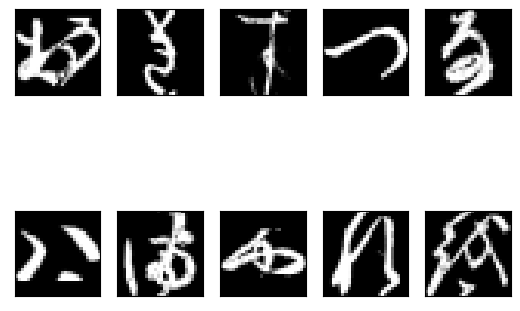

In [15]:
display_mnist_digits();

In [16]:
x_train[0].shape

(784,)

In [17]:
def binarize(image, threshold):
  return np.where(image > threshold, 1, 0).tolist()


def binary_encoder(images, threshold=127):
  return [binarize(image, threshold) for image in images]

In [18]:
X_train = binary_encoder(x_train)
X_test = binary_encoder(x_test)

In [ ]:
%%time
model = wp.Wisard(3)

model.train(X_train, y_train.tolist())

In [ ]:
def accuracy(y_pred, y_target):
  return np.where(y_pred == y_target, 1, 0).sum()/len(y_target)

In [ ]:
%%time
accuracy(model.classify(X_test), y_test)

In [ ]:
def display_digits(images):
  fig, axs = plt.subplots(2, 5, squeeze=True)

  for i, img in enumerate(images.values()):
    img = np.reshape(img, (28, 28))
    img = img/np.max(img)
    fig.axes[i].imshow(img, cmap="gray", vmin=0., vmax=1.)
    fig.axes[i].xaxis.set_visible(False)
    fig.axes[i].yaxis.set_visible(False)

  return fig

In [ ]:
display_digits(model.getMentalImages());

In [ ]:
%%time
model_2 = wp.Wisard(28)

model_2.train(X_train, y_train.tolist())

In [ ]:
print(accuracy(model_2.classify(X_test), y_test))

In [ ]:
display_digits(model_2.getMentalImages());

ClusWiSARD

In [ ]:
%%time
model_clus = wp.ClusWisard(28, 0.1, 10, 5)

model_clus.train(X_train, y_train.tolist())

In [ ]:
print(accuracy(model_clus.classify(X_test), y_test))

In [ ]:
mimgs = model_clus.getMentalImages()
mings = {label: np.array(mimgs[label]).sum(axis=0) for label in mimgs.keys()}

In [ ]:
display_digits(mings)